In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

C:\Users\khan_\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\khan_\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\khan_\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  depr

In [2]:
df = pd.read_csv('data/cleaned_data.csv')
df

,account length,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
0,128,0,1,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,107,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,137,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,84,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,75,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,0,1,156.2,77,215.5,126,279.1,83,9.9,6,2,0
3329,68,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3,0
3330,28,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2,0
3331,184,1,0,213.8,105,159.6,84,139.2,137,5.0,10,2,0


In [3]:
def evaluate(model,dt_test,dt_train,target_train,target_test):
    pred_test = model.predict(dt_test)
    pred_train = model.predict(dt_train)
    
    print('Evaluations for test:\n', confusion_matrix(target_test, pred_test))
    print(classification_report(target_test, pred_test))
    print('\n')
    print('Evaluations for train:\n',confusion_matrix(target_train, pred_train))
    print(classification_report(target_train, pred_train))

In [4]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

# Decision Tree Regression

In [5]:
# Split into training/test sets
data = df.drop('churn', axis=1)  
target = df['churn']
data_dummies = pd.get_dummies(data)
data_train, data_test, target_train, target_test = train_test_split(data_dummies, target, test_size=0.2, random_state=42)

In [6]:
data_train_smoted, target_train_smoted = SMOTE(random_state=42).fit_resample(data_train, target_train)

C:\Users\khan_\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [7]:
data_train = data_train_smoted
target_train = target_train_smoted

In [8]:
data_train = pd.DataFrame.from_records(data_train)
data_train = data_train.set_axis(['account length', 'international plan', 'voicemail plan', 'total day min',
                  'total day calls', 'total eve min', 'total eve calls', 'total night min',
                  'total night calls', 'total intl mins', 'total intl calls',
                  'coustomer service calls'], axis=1, inplace=False)

In [9]:
data_train

,account length,international plan,voicemail plan,total day min,total day calls,total eve min,total eve calls,total night min,total night calls,total intl mins,total intl calls,coustomer service calls
0,243.000000,0.000000,0.000000,95.500000,92.000000,163.700000,63.000000,264.200000,118.000000,6.600000,6.000000,2.000000
1,108.000000,0.000000,0.000000,112.000000,105.000000,193.700000,110.000000,208.900000,93.000000,4.100000,4.000000,4.000000
2,75.000000,1.000000,0.000000,222.400000,78.000000,327.000000,111.000000,208.000000,104.000000,8.700000,9.000000,1.000000
3,141.000000,0.000000,0.000000,126.900000,98.000000,180.000000,62.000000,140.800000,128.000000,8.000000,2.000000,1.000000
4,86.000000,0.000000,0.000000,216.300000,96.000000,266.300000,77.000000,214.000000,110.000000,4.500000,3.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4563,132.259505,0.051901,0.948099,226.776100,103.000000,181.345685,122.872061,259.038744,100.910080,10.692033,4.948099,2.844297
4564,132.351324,0.808881,0.000000,181.964646,108.088813,172.295730,100.764475,184.837438,134.368745,7.929342,2.382237,0.808881
4565,100.473128,0.000000,0.000000,324.749577,107.968901,165.968237,104.728563,172.419595,99.790761,7.655042,1.930254,1.000000
4566,191.511707,0.000000,0.000000,233.609937,87.486864,291.941162,110.073815,189.102627,104.194460,13.478070,4.000000,1.268275


In [10]:
# Fit model
from sklearn.tree import DecisionTreeRegressor  

regressor = DecisionTreeRegressor(random_state=45)  
regressor.fit(data_train, target_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=45, splitter='best')

In [11]:
# Evaluate model
from sklearn.metrics import mean_absolute_error, mean_squared_error

target_pred = regressor.predict(data_test) 

evaluate(regressor, data_test, data_train, target_train, target_test)

Evaluations for test:
 [[526  40]
 [ 27  74]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       566
           1       0.65      0.73      0.69       101

    accuracy                           0.90       667
   macro avg       0.80      0.83      0.81       667
weighted avg       0.91      0.90      0.90       667



Evaluations for train:
 [[2284    0]
 [   0 2284]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2284
           1       1.00      1.00      1.00      2284

    accuracy                           1.00      4568
   macro avg       1.00      1.00      1.00      4568
weighted avg       1.00      1.00      1.00      4568



In [12]:
from sklearn.inspection import permutation_importance
r = permutation_importance(regressor, data_test, target_test,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print (f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")

0.692 +/- 0.081
0.376 +/- 0.056
0.270 +/- 0.056
0.243 +/- 0.051
0.199 +/- 0.038
0.187 +/- 0.033


# Decision Tree Classification

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
# Feature importance
tree_clf.feature_importances_

array([0.00081179, 0.27777125, 0.0550722 , 0.25921657, 0.        ,
       0.08586451, 0.        , 0.        , 0.        , 0.04063285,
       0.02922176, 0.25140906])

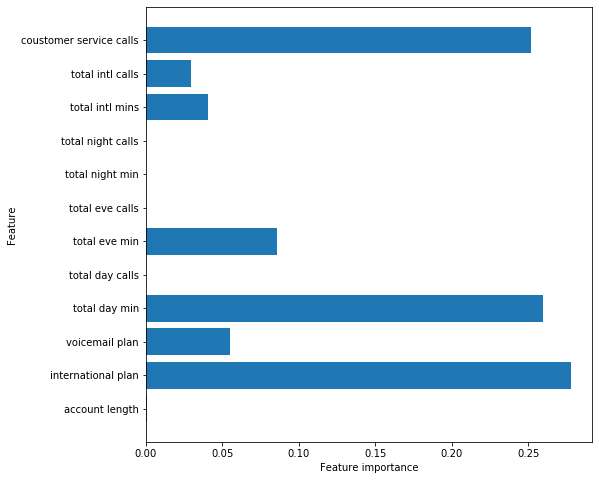

In [46]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)
plt.savefig(f'figures/feature-imp-tree_clf.png')

In [16]:
evaluate(tree_clf, data_test, data_train, target_train, target_test )

Evaluations for test:
 [[538  28]
 [ 20  81]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       566
           1       0.74      0.80      0.77       101

    accuracy                           0.93       667
   macro avg       0.85      0.88      0.86       667
weighted avg       0.93      0.93      0.93       667



Evaluations for train:
 [[2184  100]
 [ 280 2004]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2284
           1       0.95      0.88      0.91      2284

    accuracy                           0.92      4568
   macro avg       0.92      0.92      0.92      4568
weighted avg       0.92      0.92      0.92      4568



# Bagged Tree

In [17]:
# Instantiate a BaggingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [18]:
# Fit to the training data
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

In [19]:
evaluate(bagged_tree, data_test, data_train, target_train, target_test)

Evaluations for test:
 [[541  25]
 [ 20  81]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       566
           1       0.76      0.80      0.78       101

    accuracy                           0.93       667
   macro avg       0.86      0.88      0.87       667
weighted avg       0.93      0.93      0.93       667



Evaluations for train:
 [[2192   92]
 [ 268 2016]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      2284
           1       0.96      0.88      0.92      2284

    accuracy                           0.92      4568
   macro avg       0.92      0.92      0.92      4568
weighted avg       0.92      0.92      0.92      4568



# Random Forest

In [22]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
evaluate(forest, data_test, data_train, target_train, target_test)

Evaluations for test:
 [[511  55]
 [ 18  83]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       566
           1       0.60      0.82      0.69       101

    accuracy                           0.89       667
   macro avg       0.78      0.86      0.81       667
weighted avg       0.91      0.89      0.90       667



Evaluations for train:
 [[2089  195]
 [ 219 2065]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2284
           1       0.91      0.90      0.91      2284

    accuracy                           0.91      4568
   macro avg       0.91      0.91      0.91      4568
weighted avg       0.91      0.91      0.91      4568



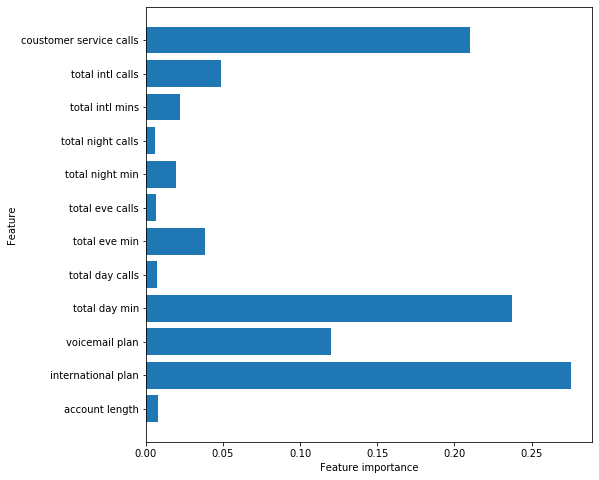

In [24]:
plot_feature_importances(forest)

# GridSearch Tuning

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [26]:
display(df.describe())

,account length,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.096910,0.276628,179.775098,100.435644,200.980348,100.114311,200.872037,100.107711,10.237294,4.479448,1.562856,0.144914
std,39.822106,0.295879,0.447398,54.467389,20.069084,50.713844,19.922625,50.573847,19.568609,2.791840,2.461214,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,87.000000,166.600000,87.000000,167.000000,87.000000,8.500000,3.000000,1.000000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,101.000000,201.400000,100.000000,201.200000,100.000000,10.300000,4.000000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,216.400000,114.000000,235.300000,114.000000,235.300000,113.000000,12.100000,6.000000,2.000000,0.000000
max,243.000000,1.000000,1.000000,350.800000,165.000000,363.700000,170.000000,395.000000,175.000000,20.000000,20.000000,9.000000,1.000000


In [27]:
# GridSearch for decisiontree 
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, data_train, target_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 92.32%


In [42]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [43]:
num_decision_trees = 2 * 6 * 3 * 6
print(f"Grid Search will have to search through {num_decision_trees} different permutations.")

Grid Search will have to search through 216 different permutations.


In [44]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(tree_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(data_train, target_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                      

In [31]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(data_test, target_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 89.12%
Mean Test Score: 91.75%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [32]:
evaluate(dt_grid_search, data_test, data_train, target_train, target_test)

Evaluations for test:
 [[539  27]
 [ 28  73]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       566
           1       0.73      0.72      0.73       101

    accuracy                           0.92       667
   macro avg       0.84      0.84      0.84       667
weighted avg       0.92      0.92      0.92       667



Evaluations for train:
 [[2264   20]
 [  36 2248]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2284
           1       0.99      0.98      0.99      2284

    accuracy                           0.99      4568
   macro avg       0.99      0.99      0.99      4568
weighted avg       0.99      0.99      0.99      4568



In [33]:
# GridSearch for random forest
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, data_train, target_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 95.47%


In [34]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [35]:
num_decision_trees = 3 * 2 * 6 * 3 * 6
print(f"Grid Search will have to search through {num_decision_trees} different permutations.")

Grid Search will have to search through 648 different permutations.


In [36]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(data_train, target_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 95.05%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [37]:
dt_score = dt_grid_search.score(data_test, target_test)
rf_score = rf_grid_search.score(data_test, target_test)

print('Decision tree grid search: ', dt_score)
print('Random forest grid search: ', rf_score)

Decision tree grid search:  0.9175412293853074
Random forest grid search:  0.9415292353823088


In [38]:
evaluate(rf_grid_search, data_test, data_train, target_train, target_test)

Evaluations for test:
 [[548  18]
 [ 21  80]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       566
           1       0.82      0.79      0.80       101

    accuracy                           0.94       667
   macro avg       0.89      0.88      0.88       667
weighted avg       0.94      0.94      0.94       667



Evaluations for train:
 [[2279    5]
 [  29 2255]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2284
           1       1.00      0.99      0.99      2284

    accuracy                           0.99      4568
   macro avg       0.99      0.99      0.99      4568
weighted avg       0.99      0.99      0.99      4568

